# Financial Inclusion Prediction

The objective of this competition is to create a machine learning model to predict which individuals are most likely to have or use a bank account. The models and solutions developed can provide an indication of the state of financial inclusion in Kenya, Rwanda, Tanzania and Uganda, while providing insights into some of the key factors driving individuals’ financial security.


The evaluation metric for this challenge is Mean Absolute error, where 1 indicates that the individual does have a bank account and 0 indicates that they do not.

Your submission file should look like:

* unique_id                   bank_account
* uniqueid_1 x Kenya              1
* uniqueid_2 x Kenya              0
* uniqueid_3 x Kenya              1  

### Import and load the dataset

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ydata_profiling import ProfileReport
from sklearn.preprocessing import LabelEncoder

%matplotlib inline

In [81]:
finance_df = pd.read_csv('datasets/financial_inclusion_dataset.csv')
finance_df.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


#### Encoding categorical data

In [3]:
finance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 23524 non-null  object
 1   year                    23524 non-null  int64 
 2   uniqueid                23524 non-null  object
 3   bank_account            23524 non-null  object
 4   location_type           23524 non-null  object
 5   cellphone_access        23524 non-null  object
 6   household_size          23524 non-null  int64 
 7   age_of_respondent       23524 non-null  int64 
 8   gender_of_respondent    23524 non-null  object
 9   relationship_with_head  23524 non-null  object
 10  marital_status          23524 non-null  object
 11  education_level         23524 non-null  object
 12  job_type                23524 non-null  object
dtypes: int64(3), object(10)
memory usage: 2.3+ MB


In [5]:
finance_df.duplicated().sum()

np.int64(0)

In [6]:
finance_df.isnull().sum()

country                   0
year                      0
uniqueid                  0
bank_account              0
location_type             0
cellphone_access          0
household_size            0
age_of_respondent         0
gender_of_respondent      0
relationship_with_head    0
marital_status            0
education_level           0
job_type                  0
dtype: int64

In [8]:
finance_df.shape

(23524, 13)

In [10]:
finance_df.describe(include='all')

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
count,23524,23524.000000,23524,23524,23524,23524,23524.000000,23524.000000,23524,23524,23524,23524,23524
unique,4,NaN,8735,2,2,2,NaN,NaN,2,6,5,6,10
top,Rwanda,NaN,uniqueid_1,No,Rural,Yes,NaN,NaN,Female,Head of Household,Married/Living together,Primary education,Self employed
freq,8735,NaN,4,20212,14343,17454,NaN,NaN,13877,12831,10749,12791,6437
mean,NaN,2016.975939,NaN,NaN,NaN,NaN,3.797483,38.805220,NaN,NaN,NaN,NaN,NaN
std,NaN,0.847371,NaN,NaN,NaN,NaN,2.227613,16.520569,NaN,NaN,NaN,NaN,NaN
min,NaN,2016.000000,NaN,NaN,NaN,NaN,1.000000,16.000000,NaN,NaN,NaN,NaN,NaN
25%,NaN,2016.000000,NaN,NaN,NaN,NaN,2.000000,26.000000,NaN,NaN,NaN,NaN,NaN
50%,NaN,2017.000000,NaN,NaN,NaN,NaN,3.000000,35.000000,NaN,NaN,NaN,NaN,NaN
75%,NaN,2018.000000,NaN,NaN,NaN,NaN,5.000000,49.000000,NaN,NaN,NaN,NaN,NaN


#### Create a ydata profile report

In [12]:
profile = ProfileReport(finance_df, title='Financial Inclusion in East Africa Report')

In [14]:
#profile.to_file(output_file='profile-report.html')

#### Analysis

The dataframe has 23524 values with 13 columns. There are neither missing values nor duplicates in the dataset. Most of the data in the dataset is categorical so we'll need to encode the data to prepare it for the machine learning model

#### Explarotory Data Analysis

In [43]:
finance_df.tail()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4,48,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2,27,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5,27,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7,30,Female,Parent,Divorced/Seperated,Secondary education,Self employed
23523,Uganda,2018,uniqueid_2117,No,Rural,Yes,10,20,Male,Child,Single/Never Married,Secondary education,No Income


#### No. of people with bank accounts per country

In [61]:
country_bank_accounts = finance_df[finance_df['bank_account'] == 'Yes'].groupby(['country'])['bank_account'].value_counts().sort_values().reset_index()
country_bank_accounts

,country,bank_account,count
0,Uganda,Yes,181
1,Tanzania,Yes,607
2,Rwanda,Yes,1003
3,Kenya,Yes,1521


#### No. of people with bank accounts per location type

In [62]:
location_bank_accounts = finance_df[finance_df['bank_account'] == 'Yes'].groupby(['location_type'])['bank_account'].value_counts().sort_values().reset_index()
location_bank_accounts

,location_type,bank_account,count
0,Urban,Yes,1641
1,Rural,Yes,1671


#### No. of people with bank accounts per gender

In [59]:
gender_bank_accounts = finance_df[finance_df.bank_account == 'Yes'].groupby(['gender_of_respondent'])['gender_of_respondent'].value_counts().sort_values().reset_index()
gender_bank_accounts

,gender_of_respondent,count
0,Female,1482
1,Male,1830


#### No. of bank accounts per education level

In [58]:
education_bank_accounts = finance_df[finance_df.bank_account == 'Yes'].groupby(['education_level'])['education_level'].value_counts().sort_values().reset_index()
education_bank_accounts

,education_level,count
0,Other/Dont know/RTA,11
1,No formal education,176
2,Vocational/Specialised training,458
3,Tertiary education,591
4,Secondary education,983
5,Primary education,1093


#### No. of bank accounts per marital status

In [57]:
marital_status_bank_accounts = finance_df[finance_df.bank_account == 'Yes'].groupby(['marital_status'])['marital_status'].value_counts().sort_values().reset_index()
marital_status_bank_accounts

,marital_status,count
0,Dont know,2
1,Divorced/Seperated,234
2,Widowed,244
3,Single/Never Married,966
4,Married/Living together,1866


#### No. of bank accounts per job type

In [55]:
job_status_bank_accounts = finance_df[finance_df.bank_account == 'Yes'].groupby(['job_type'])['job_type'].value_counts().sort_values().reset_index()
job_status_bank_accounts

,job_type,count
0,No Income,13
1,Dont Know/Refuse to answer,14
2,Government Dependent,50
3,Other Income,196
4,Remittance Dependent,240
5,Formally employed Government,300
6,Informally employed,445
7,Formally employed Private,571
8,Farming and Fishing,635
9,Self employed,848


#### Feature Engineering

In [36]:
#Convert year to date type
finance_df['year'] = pd.to_datetime(finance_df['year'], format='%Y')

In [41]:
finance_df['year'] = finance_df.year.dt.year

In [42]:
finance_df.year.dtype

dtype('int32')

### Encoding Categorical Columns

In [86]:
finance_df.head(1)

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,1,Rural,1,3,24,2,Spouse,Married/Living together,Secondary education,Self employed


In [63]:
categorical_cols = ['country','location_type','year', 
                    'relationship_with_head', 'marital_status', 
                    'education_level', 'job_type'
                   ]
numerical_cols = ['household_size', 'age_of_respondent']

In [83]:
# Let's replace the gender with 1 - Male & 2 - Female
finance_df['gender_of_respondent'] = finance_df['gender_of_respondent'].replace({'Male': 1, 'Female': 2})

/var/folders/2n/nhlh4nm154xb4lkg1bcp7skh0000gn/T/ipykernel_24045/399365594.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  finance_df['gender_of_respondent'] = finance_df['gender_of_respondent'].replace({'Male': 1, 'Female': 2})


In [84]:
# Let's replace the bank account with 1 - Yes & 2 - No
finance_df['bank_account'] = finance_df['bank_account'].replace({'Yes': 1, 'No': 2})

/var/folders/2n/nhlh4nm154xb4lkg1bcp7skh0000gn/T/ipykernel_24045/3045010761.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  finance_df['bank_account'] = finance_df['bank_account'].replace({'Yes': 1, 'No': 2})


In [85]:
# Let's replace the cellphone access with 1 - Yes & 2 - No
finance_df['cellphone_access'] = finance_df['cellphone_access'].replace({'Yes': 1, 'No': 2})

/var/folders/2n/nhlh4nm154xb4lkg1bcp7skh0000gn/T/ipykernel_24045/1475044225.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  finance_df['cellphone_access'] = finance_df['cellphone_access'].replace({'Yes': 1, 'No': 2})


In [88]:
le = LabelEncoder()

for x in categorical_cols:
    finance_df[x] = le.fit_transform(finance_df[x])

In [89]:
finance_df.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,0,2,uniqueid_1,1,0,1,3,24,1,5,2,3,9
1,0,2,uniqueid_2,2,0,2,5,70,1,1,4,0,4
2,0,2,uniqueid_3,1,1,1,5,26,0,3,3,5,9
3,0,2,uniqueid_4,2,0,1,5,34,1,1,2,2,3
4,0,2,uniqueid_5,2,1,2,8,26,0,0,3,2,5


### Checking & Handling Outliers

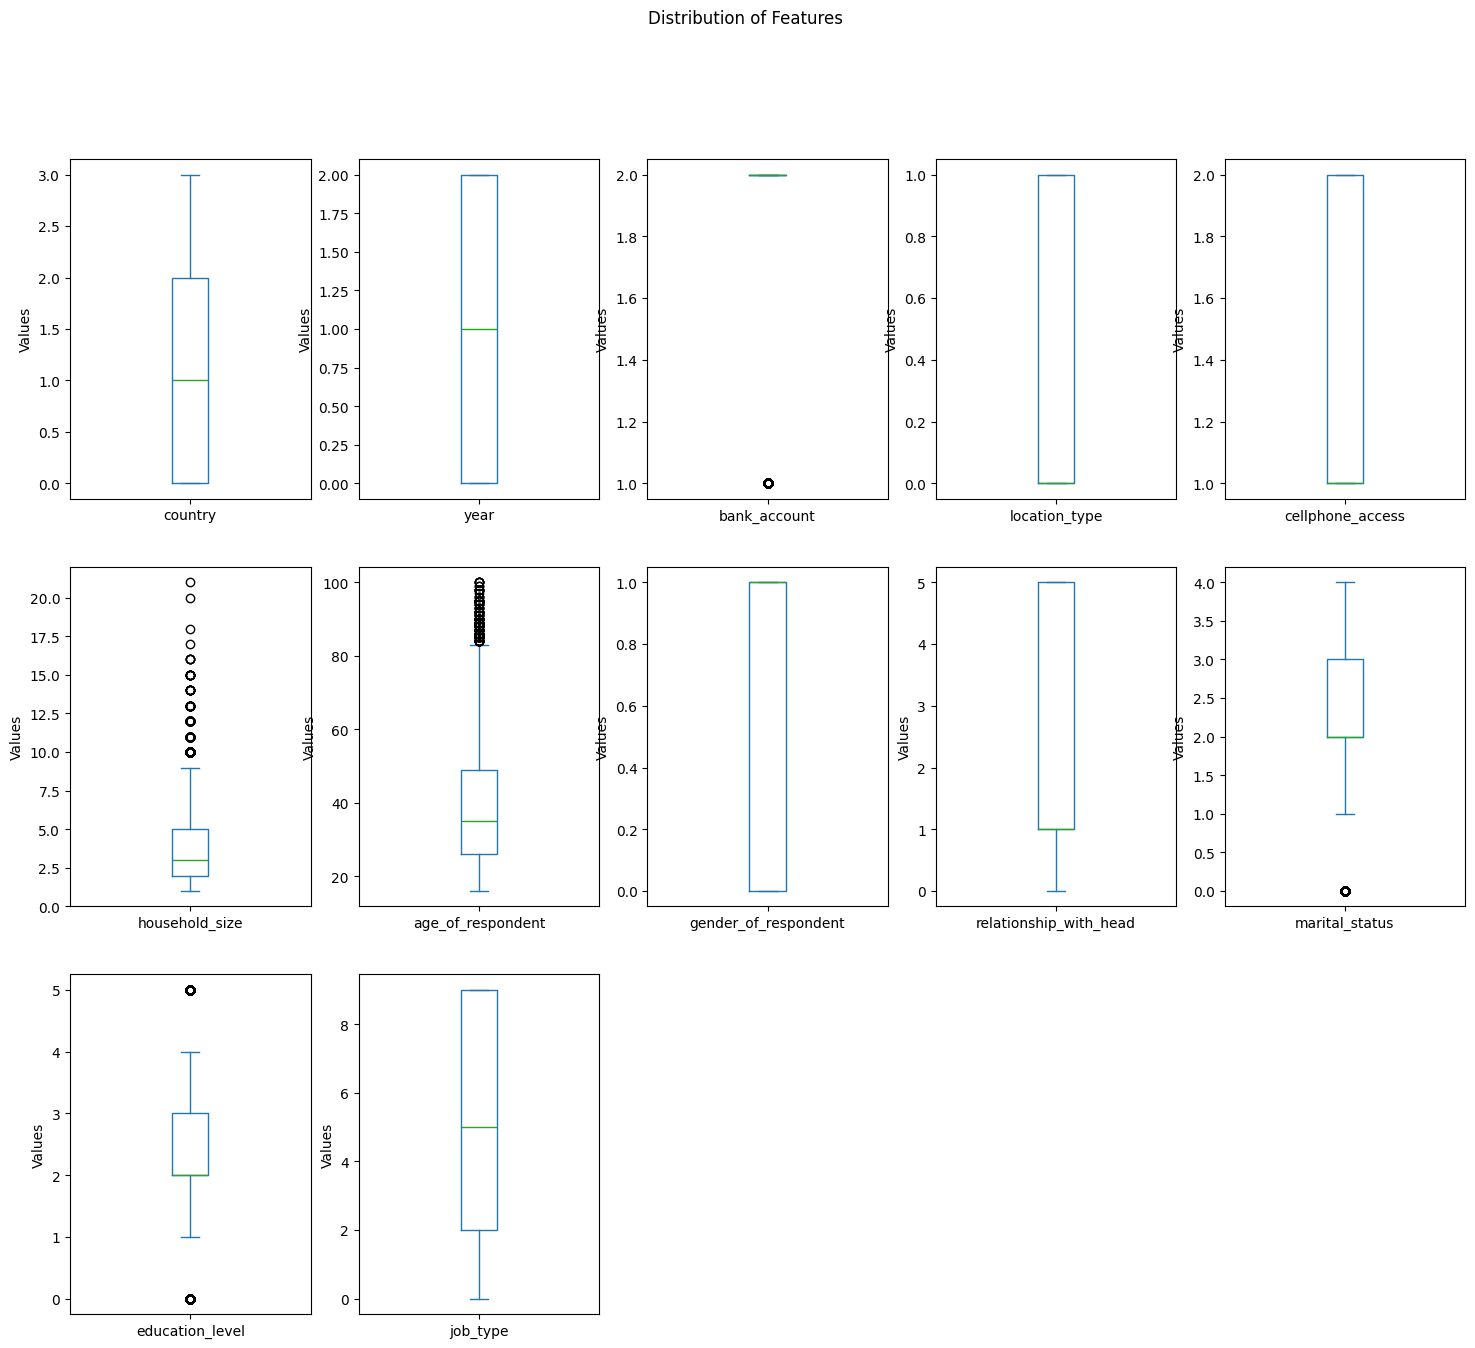

In [90]:
finance_df.plot(kind = 'box', subplots = True, figsize = (18,15), layout = (3,5), ylabel = 'Values', title = 'Distribution of Features')
plt.show()